In [1]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Path to dataset
train_path = r"C:\Users\Vennila's gadget\OneDrive\Documents\Prodigy works\dogs_cats_sample_1000\train"
valid_path = r"C:\Users\Vennila's gadget\OneDrive\Documents\Prodigy works\dogs_cats_sample_1000\valid"


In [91]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64))  # Resize for uniformity
                images.append(img)
                labels.append(label)
    return images, labels

In [92]:
# Load test images (assuming you have a way to label them; otherwise, leave labels as 'unknown')
train_images, train_labels = load_images_from_folder(train_path)
valid_images, valid_labels = load_images_from_folder(valid_path)

In [93]:
# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)

In [94]:
print(train_images)
print(train_labels)
print(valid_images)
print(valid_labels)

[[[[  8   8   8]
   [  8   8   8]
   [  8   8   8]
   ...
   [  8   8   8]
   [  8   8   8]
   [  8   8   8]]

  [[  8   8   8]
   [  8   8   8]
   [  8   8   8]
   ...
   [  8   8   8]
   [  8   8   8]
   [  8   8   8]]

  [[  8   8   8]
   [  8   8   8]
   [  8   8   8]
   ...
   [  8   8   8]
   [  8   8   8]
   [  8   8   8]]

  ...

  [[ 10  23  89]
   [ 11  15  82]
   [ 11  17  66]
   ...
   [ 11  11  51]
   [  6   8  40]
   [ 11   9  37]]

  [[ 12   7  86]
   [ 21  17  89]
   [ 13  17  98]
   ...
   [ 10  10  45]
   [ 10   9  36]
   [ 12   9  31]]

  [[ 22  21  86]
   [ 18  33 100]
   [  4   8  82]
   ...
   [ 10   9  36]
   [ 10   8  26]
   [  9   9  22]]]


 [[[ 60 112 135]
   [ 61 113 136]
   [ 66 119 140]
   ...
   [185 161 215]
   [182 158 213]
   [182 159 211]]

  [[ 67 119 142]
   [ 71 123 146]
   [ 70 121 147]
   ...
   [189 165 219]
   [183 159 213]
   [186 160 213]]

  [[ 64 116 139]
   [ 64 116 139]
   [ 59 109 137]
   ...
   [181 157 211]
   [187 163 217]
   [182 162

In [95]:
def plot_sample_images(images, labels, title="Sample Images"):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(labels[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

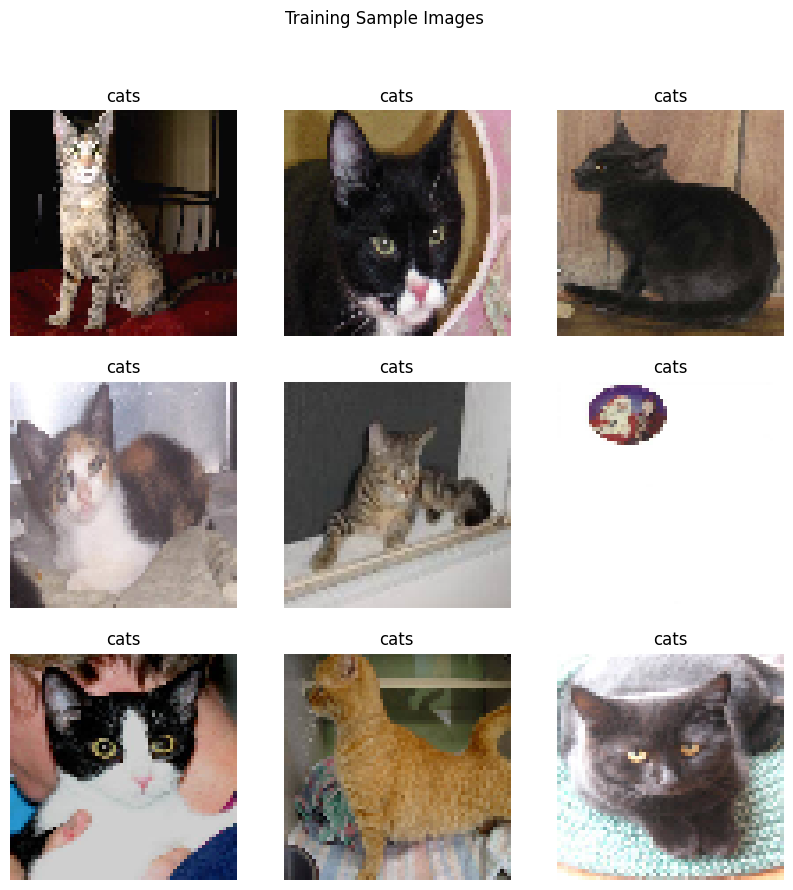

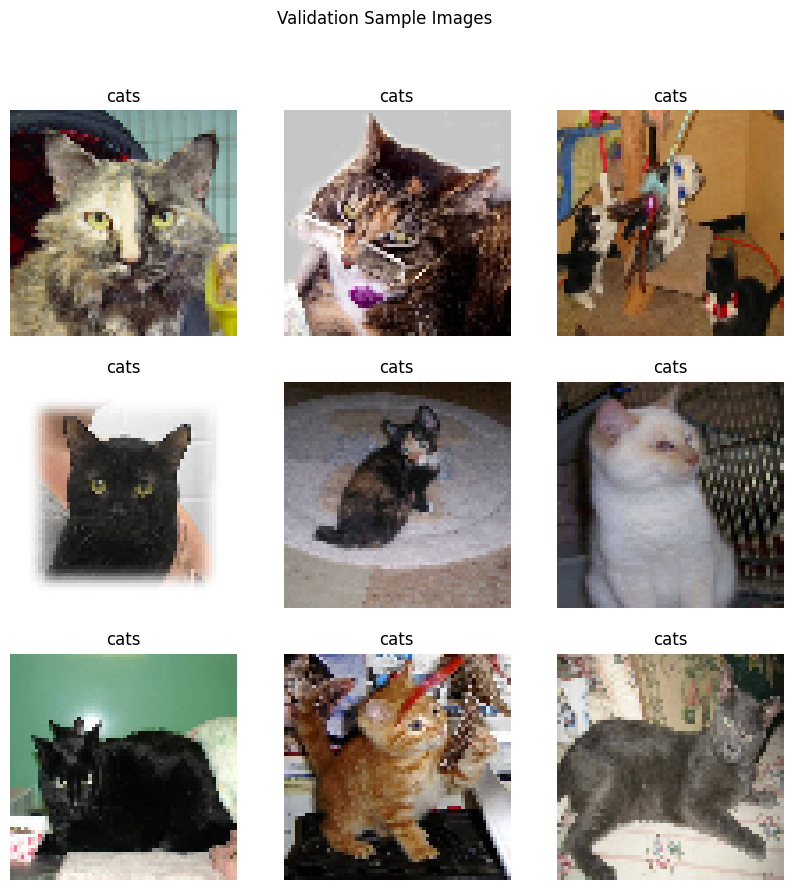

In [98]:
plot_sample_images(train_images, train_labels, "Training Sample Images")
plot_sample_images(valid_images, valid_labels, "Validation Sample Images")

In [99]:
# Flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
valid_images_flat = valid_images.reshape(valid_images.shape[0], -1)

In [100]:
# Encode labels
le = LabelEncoder()
train_labels_enc = le.fit_transform(train_labels)
valid_labels_enc = le.transform(valid_labels)

In [101]:
# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(train_images_flat, train_labels_enc, test_size=0.2, random_state=42)

In [102]:
def train_and_evaluate_svm(kernel_type):
    # Define SVM model
    model = SVC(kernel=kernel_type, C=1.0)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Evaluate the model
    print(f"Kernel: {kernel_type}")
    print("Classification Report:")
    print(classification_report(y_val, y_val_pred, target_names=le.classes_))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.show()
    print("Accuracy:", accuracy_score(y_val, y_val_pred))

Kernel: linear
Classification Report:
              precision    recall  f1-score   support

        cats       0.55      0.62      0.58       199
        dogs       0.57      0.51      0.54       201

    accuracy                           0.56       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.56      0.56      0.56       400

Confusion Matrix:


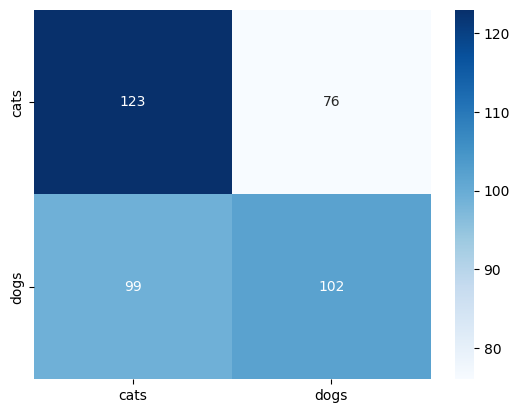

Accuracy: 0.5625
Kernel: poly
Classification Report:
              precision    recall  f1-score   support

        cats       0.57      0.66      0.61       199
        dogs       0.60      0.51      0.55       201

    accuracy                           0.58       400
   macro avg       0.59      0.59      0.58       400
weighted avg       0.59      0.58      0.58       400

Confusion Matrix:


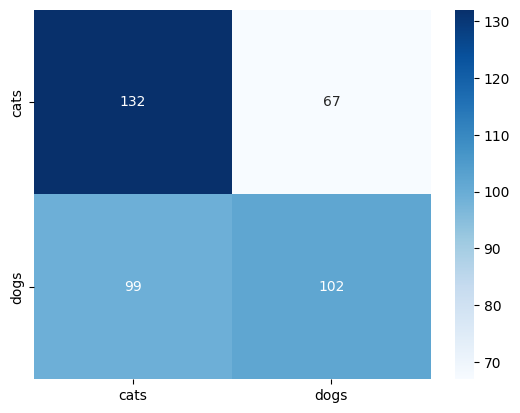

Accuracy: 0.585
Kernel: rbf
Classification Report:
              precision    recall  f1-score   support

        cats       0.63      0.66      0.65       199
        dogs       0.65      0.62      0.63       201

    accuracy                           0.64       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.64      0.64      0.64       400

Confusion Matrix:


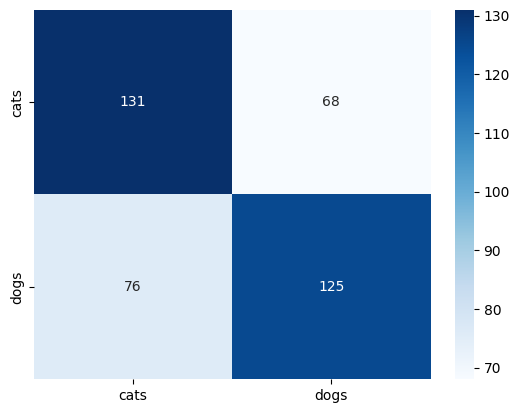

Accuracy: 0.64
Kernel: sigmoid
Classification Report:
              precision    recall  f1-score   support

        cats       0.53      0.54      0.54       199
        dogs       0.54      0.53      0.53       201

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.53       400
weighted avg       0.54      0.54      0.53       400

Confusion Matrix:


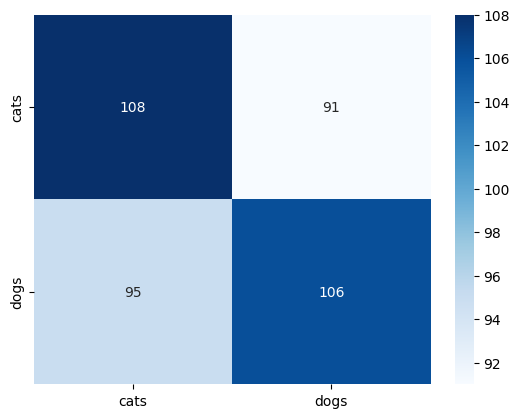

Accuracy: 0.535


In [103]:
# Train and evaluate using different kernels
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    train_and_evaluate_svm(kernel)

In [104]:
# Choose the best model (assuming RBF was the best for this example)
best_model = SVC(kernel='rbf', C=1.0)
best_model.fit(train_images_flat, train_labels_enc)

SVC()

In [105]:
# Predict on the validation set
y_valid_pred = best_model.predict(valid_images_flat)

Test Set Evaluation
Classification Report:
              precision    recall  f1-score   support

        cats       0.64      0.63      0.64      1002
        dogs       0.64      0.65      0.64       998

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000

Confusion Matrix:


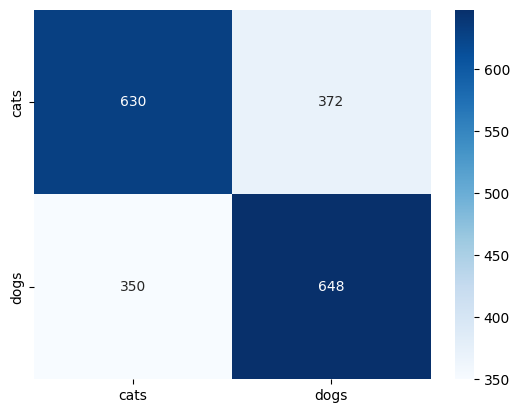

Accuracy: 0.639


In [106]:
# Evaluate on the test set
print("Test Set Evaluation")
print("Classification Report:")
print(classification_report(valid_labels_enc, y_valid_pred, target_names=le.classes_))
print("Confusion Matrix:")
cm_test = confusion_matrix(valid_labels_enc, y_valid_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.show()
print("Accuracy:", accuracy_score(valid_labels_enc, y_valid_pred))